<H1> Airbnb Review Analytics </H1>

Text analytics over the airbnb listings over the city of NYC.





# Imports and Loading the data

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
#import geopandas as gpd


In [47]:
#import geopandas as gpd

# Load the CSV data into pandas DataFrames
listings_df = pd.read_csv('../data/listings.csv')
neighbourhoods_df = pd.read_csv('../data/neighbourhoods.csv')
reviews_df = pd.read_csv('../data/reviews.csv')

In [48]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
...,...,...,...,...,...,...
969481,1295054021439479562,1318207836791174950,2024-12-23,485243180,Vennela,The place was amazing! Great location and area...
969482,1295058207773420592,1302324242336666111,2024-12-01,368726917,Veronica,This was the perfect stay for our trip. Margar...
969483,1295058207773420592,1305143295960134335,2024-12-05,431518239,Rudy,….lugar increíble me sentí como en casa
969484,1295058207773420592,1309605174750125344,2024-12-11,26420925,Tara,We loved this place and would stay again. Our...


In [49]:
listings_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,39572,https://www.airbnb.com/rooms/39572,20250103033441,2025-01-03,city scrape,1 br in a 2 br apt (Midtown West),NaN,NaN,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,...,5.00,4.98,4.86,NaN,f,2,1,1,0,0.25
1,39593,https://www.airbnb.com/rooms/39593,20250103033441,2025-01-03,city scrape,A lovely room w/ a Manhattan view,"A private, furnished large room to rent Jan/F...","Nate Silver called this super safe, clean, qui...",https://a0.muscache.com/pictures/0b9110f7-3b24...,110506,...,4.96,4.79,4.93,NaN,f,1,0,1,0,0.20
2,39704,https://www.airbnb.com/rooms/39704,20250103033441,2025-01-03,previous scrape,"Private, Large & Sunny 1BR w/W&D",It's a No Brainer:<br />•Terrific Space For Le...,The Neighborhood<br />• Rich History <br />• B...,https://a0.muscache.com/pictures/0bc4e8a4-c047...,170510,...,4.92,4.38,4.72,NaN,f,2,2,0,0,1.93
3,42300,https://www.airbnb.com/rooms/42300,20250103033441,2025-01-03,city scrape,Beautiful Lower East Side Loft,Architect-owned loft is a corner unit in a bea...,"The apartment is in the border of Soho, LES an...",https://a0.muscache.com/pictures/0e285e13-ee14...,184755,...,4.87,4.57,4.62,NaN,f,1,1,0,0,0.40
4,42729,https://www.airbnb.com/rooms/42729,20250103033441,2025-01-03,city scrape,@HouseOnHenrySt - Private 2nd bedroom w/shared...,NaN,"Lovely old Brooklyn neighborhood, with brick/b...",https://a0.muscache.com/pictures/925fe213-f5e1...,11481,...,4.73,4.58,4.64,NaN,f,4,1,3,0,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37779,1322024128476576885,https://www.airbnb.com/rooms/1322024128476576885,20250103033441,2025-01-03,city scrape,"The Gem of Riverdale, NYC!",Visiting NYC and looking for a place to stay? ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,35391290,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
37780,1322305006441883773,https://www.airbnb.com/rooms/1322305006441883773,20250103033441,2025-01-03,city scrape,Amazing 1BR & 1BTH,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,504878421,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
37781,1322523395081457963,https://www.airbnb.com/rooms/1322523395081457963,20250103033441,2025-01-03,city scrape,Home Share w/ Young Professionals - 2/3/4/5 Tr...,"Sun-filled, fully furnished apartment located ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2822805,...,NaN,NaN,NaN,NaN,f,21,0,21,0,NaN
37782,1322561224337225530,https://www.airbnb.com/rooms/1322561224337225530,20250103033441,2025-01-03,city scrape,Bedroom for rent in two bedroom UWS apartment,bedroom available for short and long-term rent...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,666385153,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [50]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [51]:
listings_df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [52]:
print("Property type: ", listings_df['property_type'].unique())
#print("Amenities: ", listings_df['amenities'].unique())

Property type:  ['Private room in rental unit' 'Private room in condo' 'Entire townhouse'
 'Entire loft' 'Private room in townhouse' 'Entire rental unit'
 'Private room in home' 'Private room in loft'
 'Private room in guest suite' 'Entire place'
 'Private room in bed and breakfast' 'Entire guesthouse' 'Entire condo'
 'Entire home' 'Room in boutique hotel' 'Entire serviced apartment'
 'Entire guest suite' 'Private room in houseboat' 'Private room'
 'Shared room in rental unit' 'Private room in guesthouse' 'Boat'
 'Room in serviced apartment' 'Private room in religious building'
 'Casa particular' 'Private room in villa'
 'Private room in serviced apartment' 'Shared room in home' 'Cave'
 'Shared room in townhouse' 'Private room in tiny home' 'Entire bungalow'
 'Floor' 'Room in hotel' 'Shared room in condo' 'Houseboat'
 'Private room in bungalow' 'Entire villa' 'Private room in floor'
 'Room in aparthotel' 'Entire bed and breakfast' 'Private room in resort'
 'Entire cottage' 'Shared room

In [53]:
listings_df['review_scores_rating'].unique()

array([4.86, 4.93, 4.71, 4.8 , 4.66, 5.  , 4.69, 4.64, 4.78, 4.68, 4.58,
       4.88, 4.91, 4.89, 4.77, 4.42,  nan, 4.72, 4.44, 4.97, 4.34, 4.52,
       4.4 , 4.55, 4.82, 4.59, 4.  , 4.65, 4.35, 4.87, 4.84, 4.73, 4.85,
       4.41, 4.95, 4.63, 4.49, 4.83, 4.67, 4.75, 4.81, 4.05, 4.62, 4.74,
       4.53, 4.5 , 4.79, 4.33, 4.54, 4.96, 4.98, 4.7 , 4.94, 4.9 , 4.17,
       4.56, 4.76, 4.51, 4.45, 4.38, 4.6 , 4.99, 4.92, 4.18, 4.25, 3.75,
       4.61, 4.57, 3.43, 4.23, 4.2 , 4.26, 4.11, 4.29, 4.22, 4.14, 0.  ,
       4.43, 4.36, 4.48, 4.47, 4.28, 4.21, 4.32, 4.15, 3.  , 4.24, 4.39,
       4.37, 3.6 , 4.31, 4.12, 4.13, 4.16, 4.46, 4.3 , 4.27, 4.19, 1.  ,
       3.5 , 3.88, 2.  , 4.09, 3.67, 4.07, 3.86, 4.1 , 3.83, 3.25, 4.08,
       3.33, 2.5 , 1.5 , 4.06, 3.92, 4.02, 3.73, 3.89, 3.42, 3.87, 3.8 ,
       3.13, 2.33, 3.93, 3.71, 3.4 , 2.67, 3.65, 3.74, 3.94, 3.17, 2.44,
       4.01, 3.81, 4.04, 4.03, 3.85, 3.91, 3.63, 3.78, 3.2 , 3.26, 3.58,
       2.75, 3.72, 3.57, 3.84, 3.64, 2.8 , 3.96, 3.

In [54]:
listings_df['price'].unique()

array(['$139.00', '$78.00', nan, '$750.00', '$185.00', '$165.00',
       '$110.00', '$98.00', '$240.00', '$81.00', '$65.00', '$70.00',
       '$205.00', '$310.00', '$170.00', '$500.00', '$60.00', '$75.00',
       '$100.00', '$95.00', '$150.00', '$130.00', '$90.00', '$73.00',
       '$114.00', '$115.00', '$96.00', '$102.00', '$248.00', '$350.00',
       '$103.00', '$125.00', '$157.00', '$118.00', '$300.00', '$230.00',
       '$83.00', '$200.00', '$105.00', '$99.00', '$119.00', '$262.00',
       '$85.00', '$220.00', '$285.00', '$89.00', '$124.00', '$145.00',
       '$135.00', '$120.00', '$195.00', '$190.00', '$349.00', '$199.00',
       '$900.00', '$183.00', '$141.00', '$279.00', '$325.00', '$160.00',
       '$657.00', '$79.00', '$175.00', '$221.00', '$295.00', '$286.00',
       '$249.00', '$259.00', '$112.00', '$425.00', '$129.00', '$56.00',
       '$184.00', '$800.00', '$146.00', '$171.00', '$62.00', '$275.00',
       '$180.00', '$84.00', '$140.00', '$236.00', '$113.00', '$127.00',
   

In [58]:
listings_df[['id', 'neighbourhood_group_cleansed', 'price', 'room_type']].isnull().sum()

id                                  0
neighbourhood_group_cleansed        0
price                           14815
room_type                           0
dtype: int64

There are ~14K properties listed that do not have a price listed against them. Once we process the data by neighbourhood groups we can impute by the median value for their respective neighbourhood. 

In [59]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [94]:
reviews_df.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      3
comments         235
dtype: int64

In [60]:
neighbourhoods_df

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill
...,...,...
225,Staten Island,Tottenville
226,Staten Island,West Brighton
227,Staten Island,Westerleigh
228,Staten Island,Willowbrook


In [61]:
neighbourhoods_df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [62]:
neighbourhoods_df['neighbourhood_group'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

Number of Columns for every file : 

In [36]:
#Number of columns in listings_df

print("Listings : ", listings_df.columns.size)
print("Reviews : ", reviews_df.columns.size)
print("Neighborhoods: ", neighbourhoods_df.columns.size)

Listings :  75
Reviews :  6
Neighborhoods:  2


Shape for every file: 

In [63]:
print("Listings : ", listings_df.shape)
print("Reviews : ", reviews_df.shape)
print("Neighborhoods: ", neighbourhoods_df.shape)

Listings :  (37784, 75)
Reviews :  (969486, 6)
Neighborhoods:  (230, 2)


In the recommendation system, we can incorporate the following columns : 
* neighborhood_overview
* review_scores_rating
* amenities

We can merge the reviews.csv and listings.csv on the listing id and add the following columns to the reviews : 

* neighbourhood_group_cleansed
* room_type
* price

<h3> Merging the Datasets :</h3>

In [64]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [109]:
# Prepare the listings dataframe: select columns, rename, and set index to 'id'
listings_join = listings_df[['id', 'neighbourhood_group_cleansed', 'room_type', 'price']].rename(
    columns={'neighbourhood_group_cleansed': 'neighbourhood_group'}
).set_index('id')

# Set the index of the reviews dataframe to 'listing_id'
reviews_indexed = reviews_df[['listing_id', 'id', 'date','comments']].rename(
    columns={'comments': 'reviews', 'id':'review_id'}).set_index('listing_id')

# Join the two dataframes
reviews_merged_df = reviews_indexed.join(listings_join, how='left').reset_index()


In [ ]:
# merged_df = reviews_df.merge(
#     listings_df[['id', 'neighbourhood_group_cleansed', 'room_type', 'price']],
#     left_on='listing_id',
#     right_on='id',
#     how='left'
# )

In [110]:
reviews_merged_df

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price
0,2595,17857,2009-11-21,Notre séjour de trois nuits.\r<br/>Nous avons ...,Manhattan,Entire home/apt,$240.00
1,2595,19176,2009-12-05,Great experience.,Manhattan,Entire home/apt,$240.00
2,2595,19760,2009-12-10,I've stayed with my friend at the Midtown Cast...,Manhattan,Entire home/apt,$240.00
3,2595,34320,2010-04-09,"We've been staying here for about 9 nights, en...",Manhattan,Entire home/apt,$240.00
4,2595,46312,2010-05-25,We had a wonderful stay at Jennifer's charming...,Manhattan,Entire home/apt,$240.00
...,...,...,...,...,...,...,...
969481,1295054021439479562,1318207836791174950,2024-12-23,The place was amazing! Great location and area...,Manhattan,Entire home/apt,$400.00
969482,1295058207773420592,1302324242336666111,2024-12-01,This was the perfect stay for our trip. Margar...,Queens,Entire home/apt,$175.00
969483,1295058207773420592,1305143295960134335,2024-12-05,….lugar increíble me sentí como en casa,Queens,Entire home/apt,$175.00
969484,1295058207773420592,1309605174750125344,2024-12-11,We loved this place and would stay again. Our...,Queens,Entire home/apt,$175.00


In [111]:
reviews_df['id'].nunique()

969486

In [ ]:
# # Save reviews_df as a CSV file to your data folder
# reviews_df.to_csv('data/reviews_df.csv', index=False)


In [112]:
reviews_merged_df.columns

Index(['listing_id', 'review_id', 'date', 'reviews', 'neighbourhood_group',
       'room_type', 'price'],
      dtype='object')

# Exploratory Data Analysis

### Handling Missing Values -

In [113]:
reviews_merged_df.isnull().sum()

listing_id                  0
review_id                   0
date                        0
reviews                   235
neighbourhood_group         0
room_type                   0
price                  199384
dtype: int64

For missing price values, we can impute median values according to the neighbourhood

In [114]:
# Check if 'price' column contains non-numeric values
non_numeric_prices = reviews_merged_df[~reviews_merged_df['price'].astype(str).str.replace('[\d.,]', '', regex=True).eq('')]

# Display any non-numeric values
if not non_numeric_prices.empty:
    print("Non-numeric values found in 'price' column:")
    print(non_numeric_prices[['price']].head(10))  # Show first 10 non-numeric values if they exist
else:
    print("No non-numeric values found in 'price' column.")


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\avant\AppData\Local\Temp\ipykernel_33416\2406154379.py:2: SyntaxWarning: invalid escape sequence '\d'
  non_numeric_prices = reviews_merged_df[~reviews_merged_df['price'].astype(str).str.replace('[\d.,]', '', regex=True).eq('')]


Non-numeric values found in 'price' column:
     price
0  $240.00
1  $240.00
2  $240.00
3  $240.00
4  $240.00
5  $240.00
6  $240.00
7  $240.00
8  $240.00
9  $240.00


In [115]:
reviews_merged_df['price'].dtype

dtype('O')

Our Price column contains values with the "$" sign, before imputing with the median price for the neighbourhood, we need to remove the sign and convert it into a numeric column

In [116]:
# Remove the $ sign and convert price to numeric
reviews_merged_df['price'] = reviews_merged_df['price'].replace('[$,]', '', regex=True).astype(float)

# Impute missing price values with the median price of the corresponding neighbourhood
reviews_merged_df['price'] = reviews_merged_df.groupby('neighbourhood_group')['price'].transform(lambda x: x.fillna(x.median()))

# Verify if there are any remaining missing values
print("Missing values in 'price' after imputation:", reviews_merged_df['price'].isnull().sum())


Missing values in 'price' after imputation: 0


In [117]:
reviews_merged_df.isnull().sum()

listing_id               0
review_id                0
date                     0
reviews                235
neighbourhood_group      0
room_type                0
price                    0
dtype: int64

For missing reviews, we can just drop those rows

In [118]:
reviews_merged_df = reviews_merged_df.dropna(subset=['reviews'])

In [119]:
reviews_merged_df.isnull().sum()

listing_id             0
review_id              0
date                   0
reviews                0
neighbourhood_group    0
room_type              0
price                  0
dtype: int64

We have no missing values anymore

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean, modern style and color palette
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

Neighbourhood Group Distribution:


Neighbourhood Group Counts:
neighbourhood_group
Brooklyn         410086
Manhattan        339505
Queens           174286
Bronx             31819
Staten Island     13555
Name: count, dtype: int64


C:\Users\avant\AppData\Local\Temp\ipykernel_33416\7198505.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='viridis')


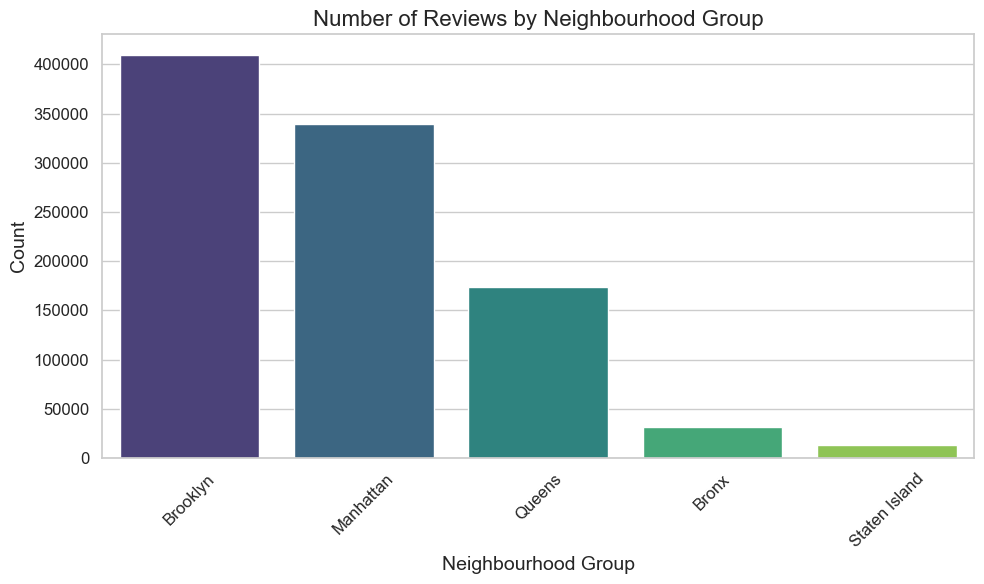

In [120]:
# Analyze 'neighbourhood_group' distribution
neighbourhood_counts = reviews_merged_df['neighbourhood_group'].value_counts()
print("\nNeighbourhood Group Counts:")
print(neighbourhood_counts)

plt.figure()
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='viridis')
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<H3> Room Distribution </H3>


Room Type Counts:
room_type
Entire home/apt    492065
Private room       469361
Hotel room           4800
Shared room          3025
Name: count, dtype: int64


C:\Users\avant\AppData\Local\Temp\ipykernel_33416\1292047469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')


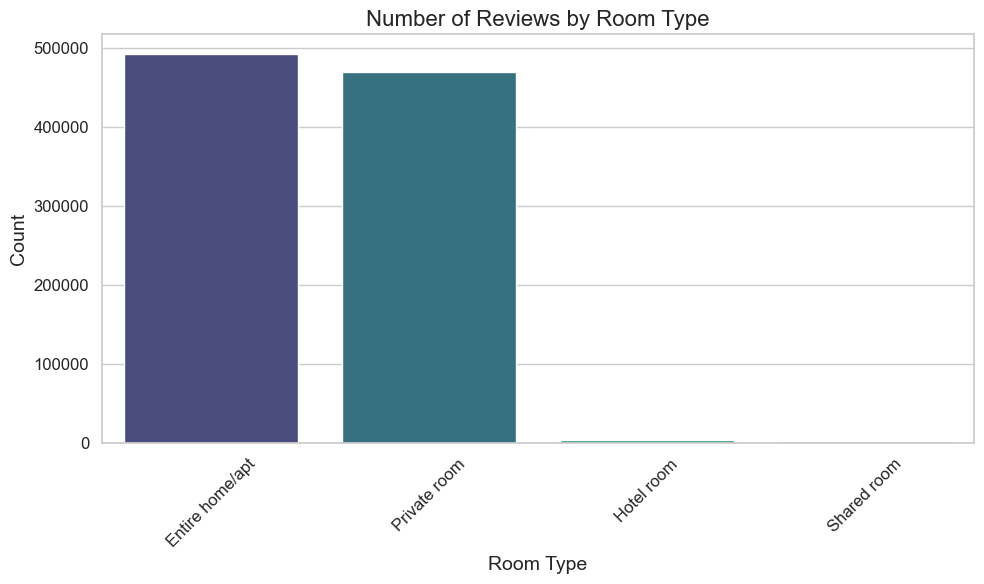

In [122]:
# Plot 3: Room Type Distribution
room_type_counts = reviews_merged_df['room_type'].value_counts()
print("\nRoom Type Counts:")
print(room_type_counts)

plt.figure()
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Number of Reviews over time</h3>

C:\Users\avant\AppData\Local\Temp\ipykernel_33416\725850854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_merged_df['date'] = pd.to_datetime(reviews_merged_df['date'], errors='coerce')


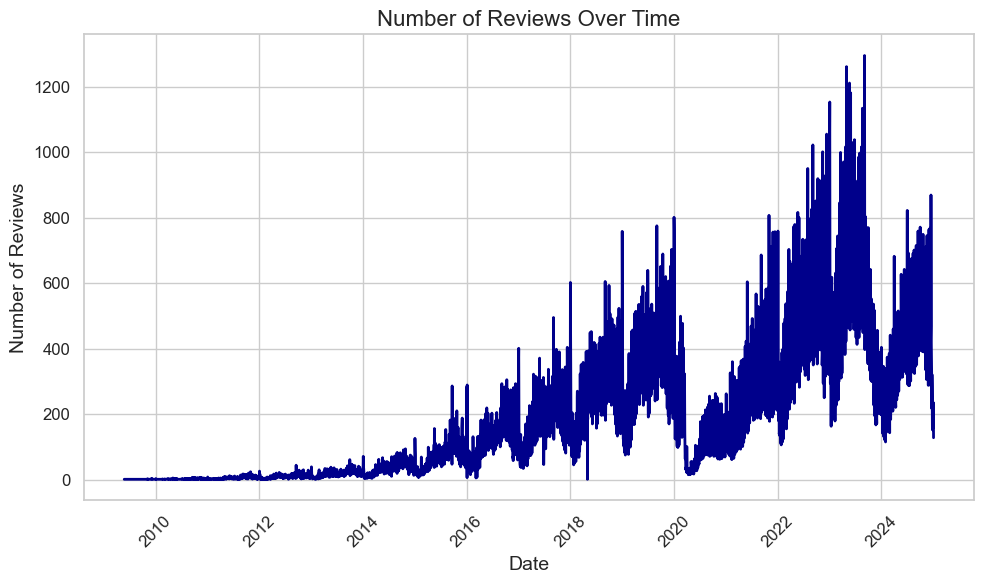

In [123]:
# Plot 1: Number of Reviews Over Time
reviews_merged_df['date'] = pd.to_datetime(reviews_merged_df['date'], errors='coerce')
reviews_by_date = reviews_merged_df['date'].value_counts().sort_index()
plt.figure()
plt.plot(reviews_by_date.index, reviews_by_date.values, color='darkblue', linewidth=2)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<H3>Price distribution</h3>

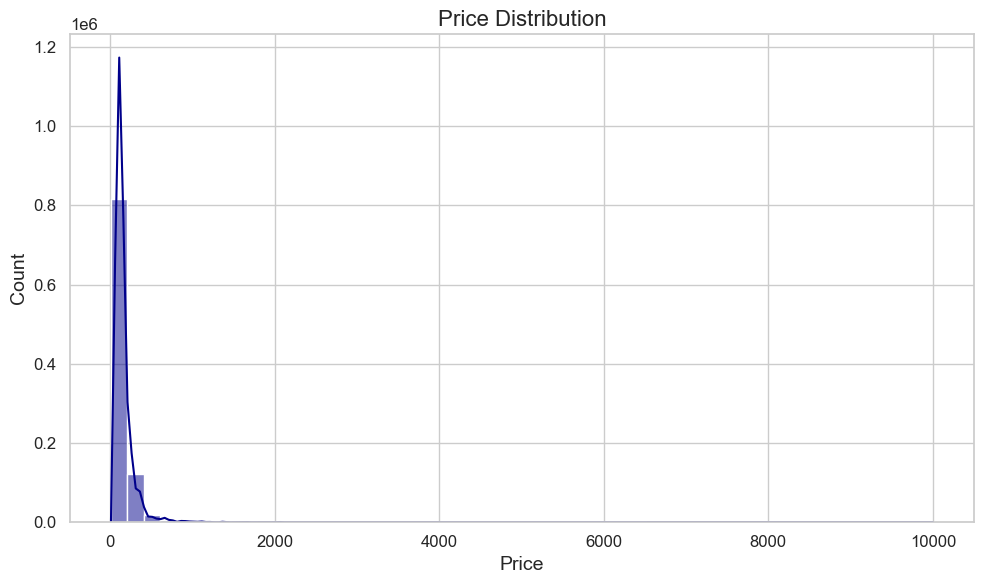

In [126]:
# Plot 4: Price Distribution
plt.figure()
sns.histplot(reviews_merged_df['price'], bins=50, kde=True, color='darkblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h3>Review Length Distribution</h3>

C:\Users\avant\AppData\Local\Temp\ipykernel_33416\3782999075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_merged_df['review_length'] = reviews_merged_df['reviews'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)



Review Length Statistics (in words):
count    969251.000000
mean         44.991745
std          45.959195
min           1.000000
25%          15.000000
50%          32.000000
75%          60.000000
max        1001.000000
Name: review_length, dtype: float64


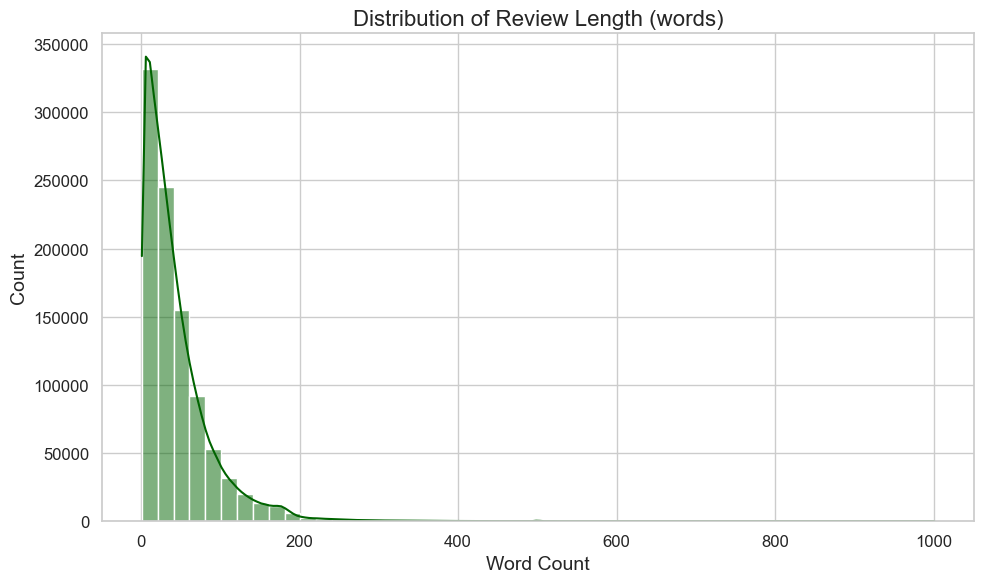

In [127]:
# Plot 5: Review Length Distribution
# Calculate the number of words per review
reviews_merged_df['review_length'] = reviews_merged_df['reviews'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
print("\nReview Length Statistics (in words):")
print(reviews_merged_df['review_length'].describe())

plt.figure()
sns.histplot(reviews_merged_df['review_length'], bins=50, kde=True, color='darkgreen')
plt.title('Distribution of Review Length (words)')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Splitting into 5 Boroughs

In [129]:
reviews_merged_df['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx'],
      dtype=object)

In [131]:
manhattan_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Manhattan"]
queens_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Queens"]
bronx_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Bronx"]
staten_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Staten Island"]
brooklyn_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Brooklyn"]

# Preprocessing the Text

# Feature Engineering